In [1]:
import matplotlib.pyplot as plt
import numpy as np
import osmnx as ox

%matplotlib inline
weight_by_length = False

ox.__version__

'1.3.0'

In [2]:
places = {"Petrolina":"Petrolina Pernambuco",
          "Juazeiro":"Juazeiro Bahia"
         }


In [3]:
gdf = ox.geocode_to_gdf(list(places.values()))
gdf

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((-40.95904 -8.84198, -40.95509 -8.843...",-8.623499,-9.483096,-40.208,-40.959039,297434820,relation,303629,-9.381733,-40.496887,"Petrolina, Região Geográfica Imediata de Petro...",boundary,administrative,0.697662
1,"POLYGON ((-40.81500 -9.87900, -40.81400 -9.895...",-9.054605,-9.915000,-39.862,-40.815000,297150276,relation,362302,-9.433696,-40.506820,"Juazeiro, Região Geográfica Imediata de Juazei...",boundary,administrative,0.730578


2023-03-27 22:19:26 Juazeiro
2023-03-27 22:21:41 Petrolina


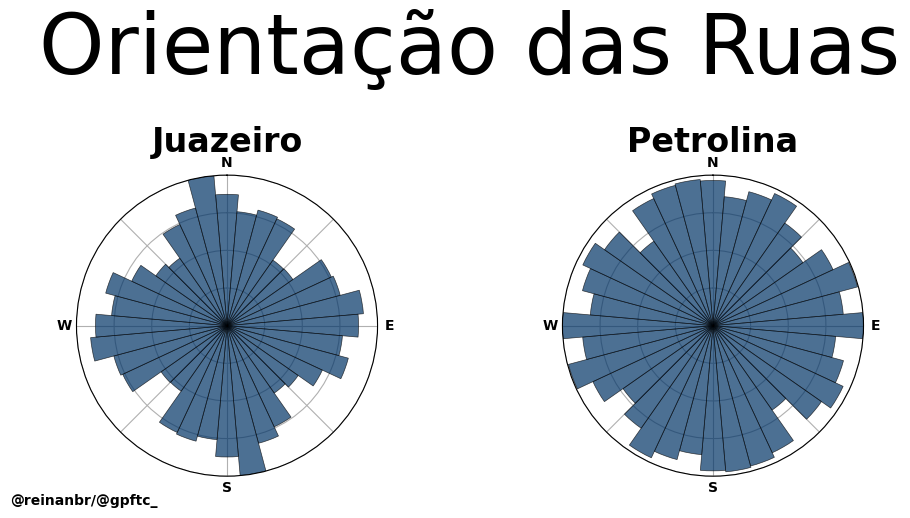

In [9]:
# create figure and axes
n = len(places)
ncols = int(np.ceil(np.sqrt(n)))
nrows = int(np.ceil(n / ncols))
figsize = (ncols * 5, nrows * 5)
fig, axes = plt.subplots(nrows, ncols, figsize=figsize, subplot_kw={"projection": "polar"})

# plot each city's polar histogram
for ax, place in zip(axes.flat, sorted(places.keys())):
    print(ox.utils.ts(), place)

    # get undirected graphs with edge bearing attributes
    G = ox.graph_from_place(place, network_type="drive")
    Gu = ox.add_edge_bearings(ox.get_undirected(G))
    fig, ax = ox.bearing.plot_orientation(Gu, ax=ax, title=place, area=True)

# add figure title and save image
suptitle_font = {
    "family": "DejaVu Sans",
    "fontsize": 60,
    "fontweight": "normal",
    "y": 1,
}
fig.suptitle("Orientação das Ruas", **suptitle_font)
fig.tight_layout()
fig.subplots_adjust(hspace=0.35)
plt.text(0.04, 0.01, '@reinanbr/@gpftc_', fontsize=10, fontweight='bold', transform=plt.gcf().transFigure)
#        about_key=self.data.get_noaa_keys()[self.key_noaa]
fig.savefig("street-orientations.png", facecolor="w", dpi=100, bbox_inches="tight")
plt.show()